In [2]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np

test_df = pd.read_csv('data/data.csv')
test_df

,dry_tone_path,wet_tone_path,HighShelfFilter,Delay,Chorus,Phaser,Invert,Limiter,LadderFilter,HighpassFilter,Distortion,LowShelfFilter,PitchShift,NoiseGate,Gain,Compressor,Clipping,PeakFilter
0,data/dry_tones/Electric1.wav,data/wet_tones/output_0.wav,"{'cutoff_frequency_hz': 18111.94480089492, 'ga...","{'delay_seconds': 0.739253228391229, 'feedback...","{'rate_hz': 0.5560240759672531, 'depth': 0.166...","{'rate_hz': 0.8914836956814818, 'depth': 0.928...",{'Order': 7},"{'threshold_db': -98.4150329569796, 'release_m...","{'cutoff_hz': 19708.35594102612, 'resonance': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data/dry_tones/Electric1.wav,data/wet_tones/output_1.wav,"{'cutoff_frequency_hz': 9569.86164992271, 'gai...",NaN,"{'rate_hz': 0.38461456036547836, 'depth': 0.99...",NaN,{'Order': 5},"{'threshold_db': -57.33924578873351, 'release_...",NaN,"{'cutoff_frequency_hz': 7434.859203564872, 'Or...","{'drive_db': 57.14718976641433, 'Order': 3}","{'cutoff_frequency_hz': 3193.1545941262602, 'g...","{'semitones': 4.466721591763481, 'Order': 8}",NaN,NaN,NaN,NaN,NaN
2,data/dry_tones/Electric1.wav,data/wet_tones/output_2.wav,"{'cutoff_frequency_hz': 1208.9423259134192, 'g...",NaN,NaN,NaN,NaN,NaN,NaN,"{'cutoff_frequency_hz': 4356.550681139217, 'Or...","{'drive_db': 53.884930787875334, 'Order': 4}",NaN,NaN,"{'threshold_db': -83.17147169211398, 'attack_m...","{'gain_db': -49.39313773316485, 'Order': 1}","{'threshold_db': -90.31265286406891, 'ratio': ...",NaN,NaN
3,data/dry_tones/Electric1.wav,data/wet_tones/output_3.wav,"{'cutoff_frequency_hz': 16193.148937844326, 'g...","{'delay_seconds': 0.658409403363946, 'feedback...","{'rate_hz': 0.27031838218033977, 'depth': 0.25...",NaN,NaN,"{'threshold_db': -34.767038008987726, 'release...",NaN,NaN,NaN,NaN,"{'semitones': 3.5421021333401868, 'Order': 1}","{'threshold_db': -95.51515663530941, 'attack_m...",NaN,NaN,"{'threshold_db': 0.2956231784699168, 'Order': 4}","{'cutoff_frequency_hz': 13197.943718647211, 'g..."
4,data/dry_tones/Electric1.wav,data/wet_tones/output_4.wav,"{'cutoff_frequency_hz': 3518.180857638232, 'ga...",NaN,NaN,"{'rate_hz': 5.533801786959162, 'depth': 0.0856...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print([0]*10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


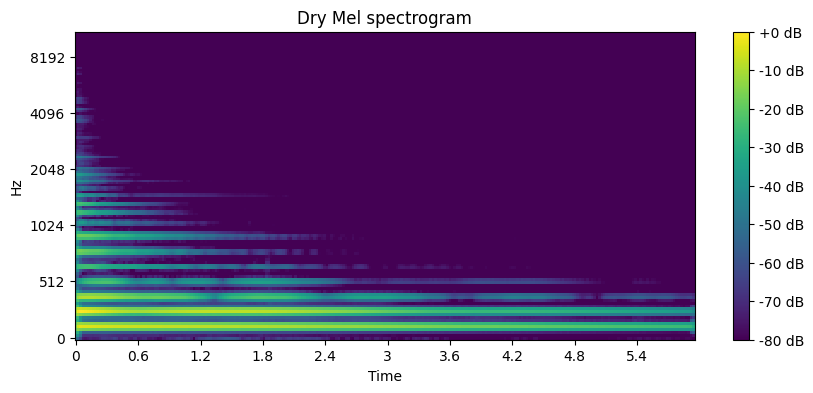

In [13]:
y, sr = librosa.load('data/dry_tones/Electric1.wav')
dry_mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
dry_mel_spectrogram_db = librosa.power_to_db(dry_mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(dry_mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Dry Mel spectrogram')
plt.show()

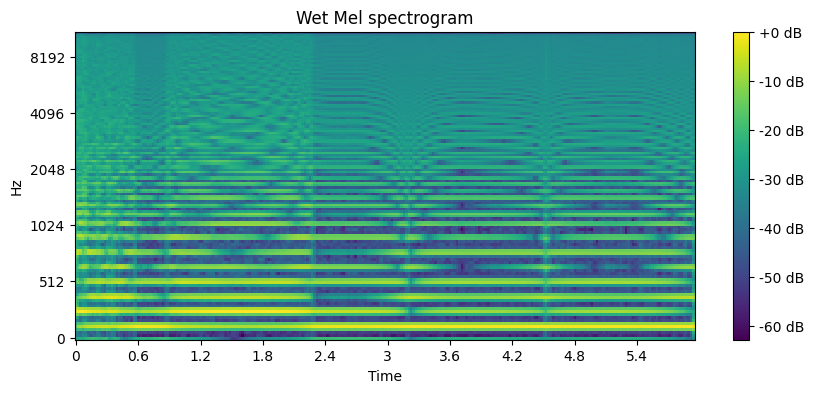

In [24]:
y, sr = librosa.load('data/wet_tones/output_1.wav')
dry_mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
dry_mel_spectrogram_db = librosa.power_to_db(dry_mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(dry_mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Wet Mel spectrogram')
plt.show()

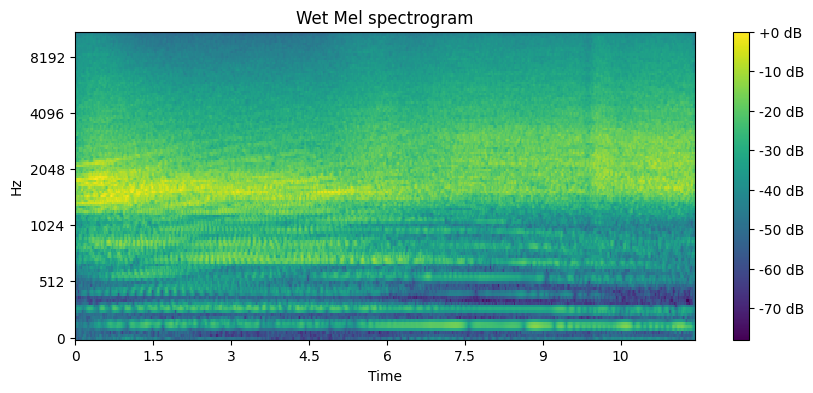

In [27]:
out = np.load('data/spectrograms/output_1.npy')


plt.figure(figsize=(10, 4))
librosa.display.specshow(out[0], x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Wet Mel spectrogram')
plt.show()


In [1]:
import librosa
from transformers import ASTModel
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

path = "data/dry_tones/Electric1.wav"
y, sr = librosa.load(path, sr=None)
features = feature_extractor(y, return_tensors="pt")
output = model(**features)

/home/jonat/capstone/neural-effects-venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
It is strongly recommended to pass the `sampling_rate` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


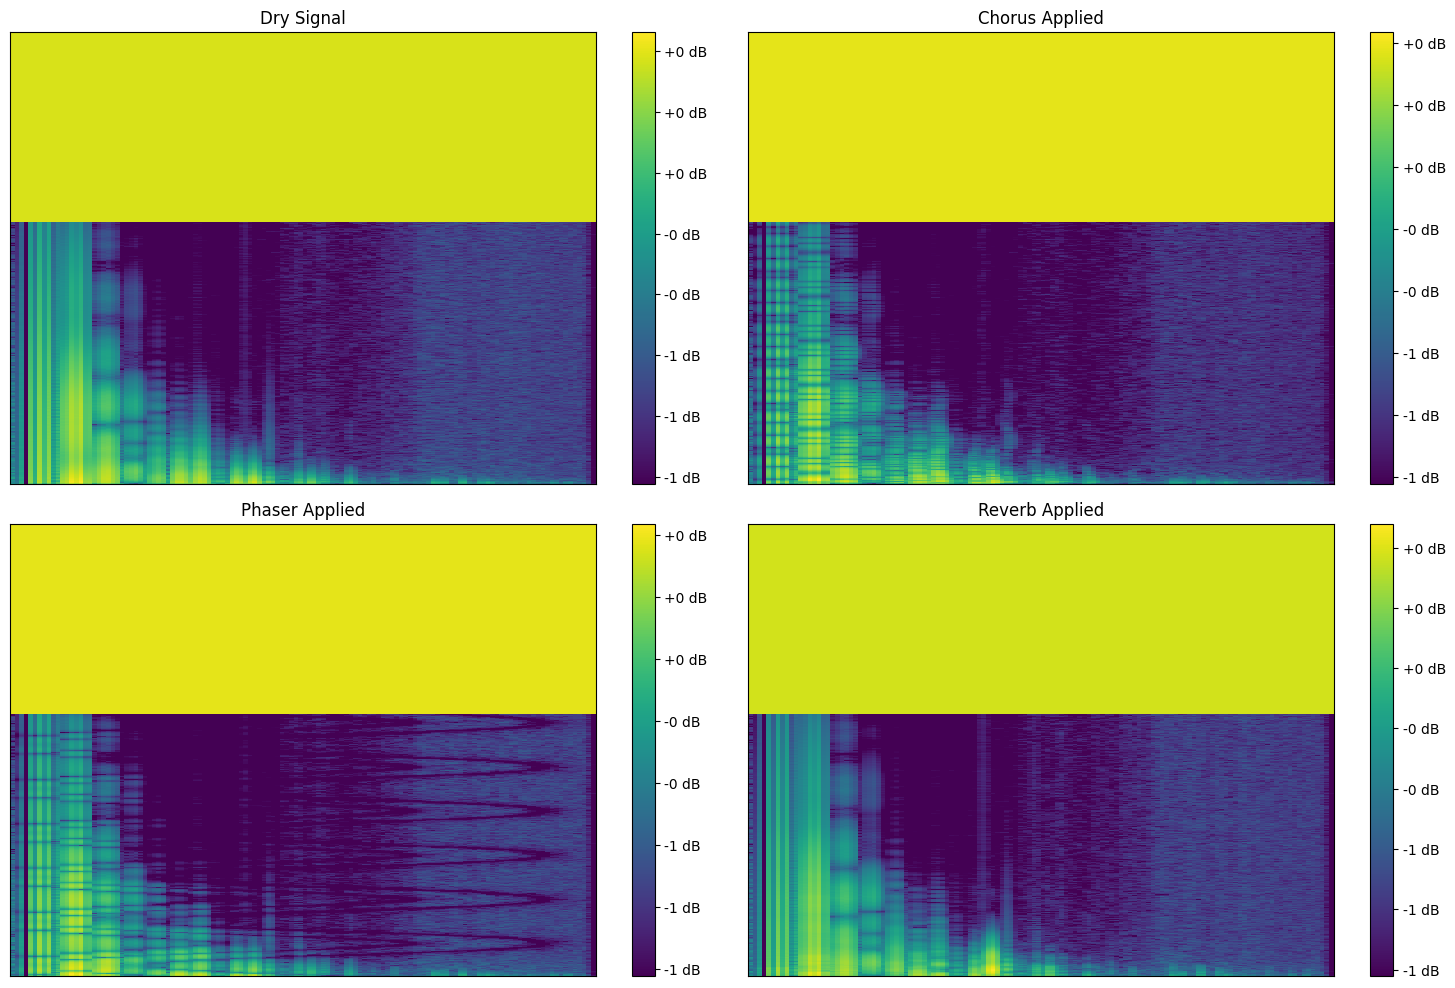

In [16]:
import librosa
from pedalboard import Pedalboard, Chorus, Phaser, Reverb, Distortion
import matplotlib.pyplot as plt

from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
# Create effects
effects = [
    Chorus(rate_hz=1.0, depth=0.5,feedback=.1),
    Phaser(rate_hz=1.0, depth=0.5,feedback=.1),
    Reverb(room_size=.5,wet_level=.5)
]

# Load audio file
path = "data/dry_tones/Electric1.wav"
y, sr = librosa.load(path, sr=16000)

# Create figure with subplots
plt.figure(figsize=(15, 10))

# Plot dry signal spectrogram
plt.subplot(2, 2, 1)
features = feature_extractor(y,sampling_rate=sr, return_tensors="pt")
dry_spec = features['input_values'].squeeze().numpy()
librosa.display.specshow(dry_spec, sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Dry Signal')

# Apply effects and plot spectrograms
for idx, effect in enumerate(effects, start=2):
    # Create pedalboard with single effect
    board = Pedalboard([effect])
    
    # Process audio
    wet_audio = board(y, sr)
    
    # Generate features
    wet_features = feature_extractor(wet_audio,sampling_rate=sr, return_tensors="pt")
    wet_spec = wet_features['input_values'].squeeze().numpy()
    
    # Plot
    plt.subplot(2, 2, idx)
    librosa.display.specshow(wet_spec, sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{effect.__class__.__name__} Applied')

plt.tight_layout()
plt.show()


In [4]:
features['input_values'].shape

torch.Size([1, 1024, 128])

In [5]:
output

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 2.3621, -0.5361, -2.0765,  ..., -0.3955, -0.7332,  0.6197],
         [ 2.3381,  0.1073, -2.6263,  ...,  0.3404, -1.7244,  0.9057],
         [ 0.8936,  0.2866,  1.3848,  ..., -1.5602, -1.2944,  0.9253],
         ...,
         [ 1.2405,  0.7948,  1.8686,  ..., -1.4713, -0.5769,  0.6907],
         [ 1.1470,  0.8173,  1.1829,  ..., -1.4050, -0.7268,  0.6316],
         [ 0.6848,  0.6077,  1.2157,  ..., -0.7321, -0.9122,  0.5439]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 2.3501e+00, -2.1440e-01, -2.3514e+00, -5.5900e-01, -7.2912e-01,
         -9.0557e-01, -8.6133e-01, -1.2991e+00, -9.0840e-02,  7.9376e-01,
         -6.6042e-01, -1.4835e+00, -1.9652e+00,  7.3631e-01, -1.0443e+00,
          1.3577e-01,  1.5768e+00,  1.5168e+00,  8.8917e-01, -9.8482e-02,
          3.0538e-01,  9.6190e-02, -5.1378e-01,  3.5552e-01,  2.4686e-01,
          1.1434e+00, -1.1660e+00, -9.5987e-01,  1.0012e+00,  2.5795e-01,
         -2